In [1]:
%pip install jiwer -q

Note: you may need to restart the kernel to use updated packages.


/var/folders/yf/wsj_53_n7w33sjkt4wd4k6_80000gn/T/ipykernel_3967/1644407577.py:78: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


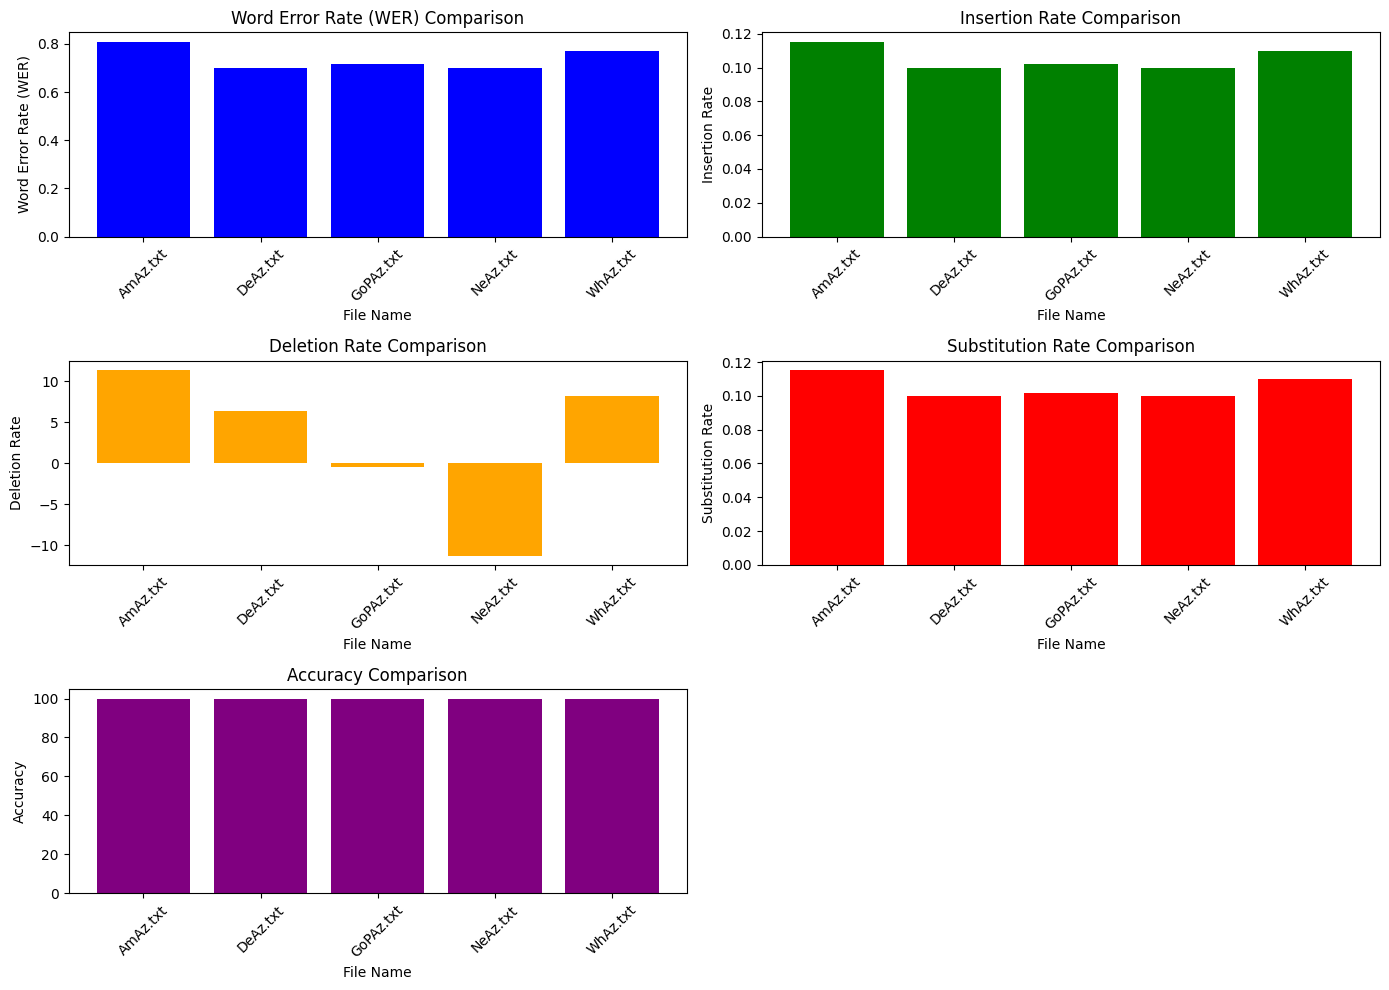

In [2]:
import string
import matplotlib.pyplot as plt
import numpy as np
from jiwer import wer

def load_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove extra whitespaces
    text = ' '.join(text.split())
    return text

def compute_wer_stats(master_text, asr_text):
    wer_score = wer(master_text, asr_text)
    num_words_master = len(master_text.split())
    num_words_asr = len(asr_text.split())
    # Compute additional statistics
    num_correct_words = num_words_master - wer_score
    insertion_rate = (wer_score / num_words_master) * 100
    deletion_rate = ((num_words_asr - num_correct_words) / num_words_master) * 100
    substitution_rate = (wer_score / num_words_master) * 100
    accuracy = (num_correct_words / num_words_master) * 100
    return {
        "Word Error Rate (WER)": wer_score,
        "Insertion Rate": insertion_rate,
        "Deletion Rate": deletion_rate,
        "Substitution Rate": substitution_rate,
        "Accuracy": accuracy
    }

if __name__ == "__main__":
    # Path to the master text file
    master_text_file_path = "../Master-friends.txt"

    # List of ASR text file paths
    asr_text_file_paths = [
        "AmAz.txt",
        "DeAz.txt",
        "GoPAz.txt",
        "NeAz.txt",
        "WhAz.txt"
    ]

    # Load master text
    master_text = load_text(master_text_file_path)
    master_text = preprocess_text(master_text)

    # Compute WER for each ASR text file
    stats = {"Word Error Rate (WER)": [], "Insertion Rate": [], "Deletion Rate": [], "Substitution Rate": [], "Accuracy": []}
    file_names = []
    for file_path in asr_text_file_paths:
        asr_text = load_text(file_path)
        asr_text = preprocess_text(asr_text)
        stat_values = compute_wer_stats(master_text, asr_text)
        for key, value in stat_values.items():
            stats[key].append(value)
        file_names.append(file_path)

    # Create plots for each statistic
    plt.figure(figsize=(14, 10))

    # Set colors for each statistic
    colors = ['blue', 'green', 'orange', 'red', 'purple']

    for i, (stat_name, values) in enumerate(stats.items(), start=1):
        plt.subplot(3, 2, i)
        plt.bar(file_names, values, color=colors[i-1])
        plt.xlabel('File Name')
        plt.ylabel(stat_name)
        plt.title(f'{stat_name} Comparison')
        plt.xticks(rotation=45)
        plt.tight_layout()

    plt.show()


Explanation for each statistic:

1. **Word Error Rate (WER):** The Word Error Rate represents the percentage of words in the ASR text that are incorrect or missing compared to the reference (master) text. A higher WER indicates a higher level of errors in the ASR output relative to the reference text, suggesting poorer accuracy.

2. **Insertion Rate:** The Insertion Rate represents the percentage of additional (extra) words present in the ASR text compared to the reference text. A higher insertion rate suggests that the ASR system tends to add extra words not present in the reference text, which may indicate over-segmentation or misrecognition of speech.

3. **Deletion Rate:** The Deletion Rate represents the percentage of missing words in the ASR text compared to the reference text. A higher deletion rate suggests that the ASR system tends to omit or miss words present in the reference text, indicating under-segmentation or failure to recognize speech.

4. **Substitution Rate:** The Substitution Rate represents the percentage of words in the ASR text that are different from the corresponding words in the reference text. A higher substitution rate indicates a higher frequency of word substitutions, where the ASR system replaces correct words with incorrect ones, suggesting inaccuracies in recognition.

5. **Accuracy:** The Accuracy represents the percentage of correctly recognized words in the ASR text compared to the total number of words in the reference text. A higher accuracy score indicates a higher proportion of words that are correctly recognized by the ASR system relative to the reference text. However, it's important to note that high accuracy does not guarantee the overall correctness or accuracy of the message conveyed by the ASR output, as it only measures word-level correctness.